<a href="https://colab.research.google.com/github/amr552/Deep-Learning/blob/main/Inception_V3%20Pre-trained%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#InceptionV3

Mounted at /content/drive
Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
87910968/87910968 [==============================] - 0s 0us/step


Epoch 1/25
41/41 [==============================] - 840s 20s/step - loss: 2.6305 - accuracy: 0.7504 - val_loss: 12.7961 - val_accuracy: 0.3438
Epoch 2/25
41/41 [==============================] - 769s 19s/step - loss: 0.7752 - accuracy: 0.9558 - val_loss: 152.6642 - val_accuracy: 0.5625
Epoch 3/25
41/41 [==============================] - 750s 18s/step - loss: 0.6558 - accuracy: 0.9651 - val_loss: 1.4559 - val_accuracy: 0.6875
Epoch 4/25
41/41 [==============================] - 758s 18s/step - loss: 0.6285 - accuracy: 0.9466 - val_loss: 900.7415 - val_accuracy: 0.3438
Epoch 5/25
41/41 [==============================] - 750s 18s/step - loss: 0.4885 - accuracy: 0.9636 - val_loss: 1.9285 - val_accuracy: 0.7812
Epoch 6/25
41/41 [==============================] - 745s 18s/step - loss: 0.3797 - accuracy: 0.9853 - val_loss: 0.3352 - val_accuracy: 0.9688
Epoch 7/25
41/41 [==============================] - 748s 18s/step - loss: 0.3183 - accuracy: 0.9845 - val_loss: 0.2568 - val_accuracy: 1.0000
E

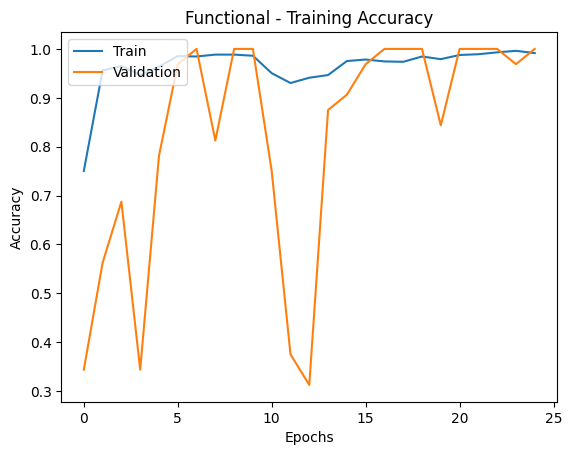

5/5 [==============================] - 57s 13s/step - loss: 0.1954 - accuracy: 0.9600
Test Accuracy: 0.9600
5/5 [==============================] - 29s 5s/step


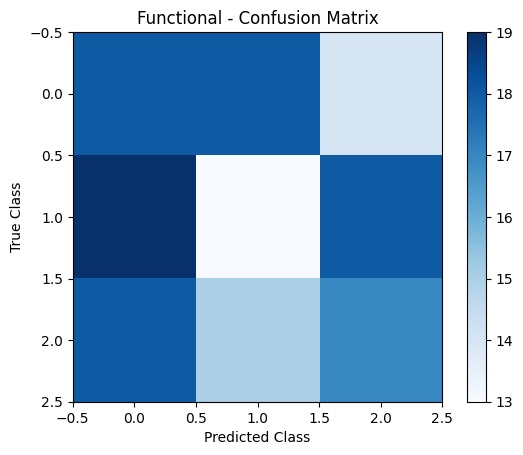

              precision    recall  f1-score   support

     Healthy       0.33      0.36      0.34        50
     Powdery       0.28      0.26      0.27        50
        Rust       0.35      0.34      0.34        50

    accuracy                           0.32       150
   macro avg       0.32      0.32      0.32       150
weighted avg       0.32      0.32      0.32       150



<ipython-input-1-916b8e11cb39>:144: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, f'saved_modelInceptionV3.h5')
/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import save_model


# Mount Google Drive (if using Google Colab)
from google.colab import drive
drive.mount('/content/drive')

# Set the paths to your training and test datasets

train_dir = "/content/drive/MyDrive/datasets/plant_disease/Train/Train"
test_dir = "/content/drive/MyDrive/datasets/plant_disease/Test/Test"
val_dir = "/content/drive/MyDrive/datasets/plant_disease/Validation/Validation"
# Set the image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,  # Reduce shearing intensity
    zoom_range=0.1,  # Reduce zooming intensity
    rotation_range=10,
    #shear_range=0.2,
    #zoom_range=0.2,
    #rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for training and test sets with data augmentation

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
)

model =InceptionV3(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3))


base_model = model
model_name = base_model.__class__.__name__

model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
# Add Dropout layer with 20% dropout rate
model.add(Dropout(0.2))  # Experiment with different dropout rates

# Dense layer with L2 regularization (weight decay)
model.add(Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))  # Adjust weight decay as needed
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(3, activation="softmax"))

    # Early stopping to prevent overfitting
#early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Model checkpoint to save the best model based on validation loss
#model_checkpoint = ModelCheckpoint('best_modelInceptionV3.h5', save_best_only=True, monitor='val_loss', mode='min')
# Early stopping to prevent overfitting
#early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Model checkpoint to save the best model based on validation loss
#model_checkpoint = ModelCheckpoint('best_modelInceptionV3.h5', save_best_only=True, monitor='val_loss', mode='min')


model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    metrics=["accuracy"],
)

# Train the model with data augmentation
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    epochs=25,
    validation_data=val_generator,
    validation_steps=val_generator.n // batch_size,
    #callbacks=[early_stopping, model_checkpoint]
)

# Generate training accuracy graph
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title(f"{model_name} - Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

#test step
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Generate confusion matrix
test_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title(f"{model_name} - Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()


# Calculate evaluation metrics
report = classification_report(test_labels, predicted_labels, target_names=train_generator.class_indices.keys())
print(report)

save_model(model, f'saved_modelInceptionV3.h5')
model.save('/content/drive/MyDrive/datasets/plant disease/models/÷Inceptionv3.h5')

